In [5]:
import pandas as pd
import numpy as np
from sklearn import *

import matplotlib.pyplot as plt

%matplotlib inline


/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [6]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [9]:
target = "default"
y = np.where(df[target] == 2, 1, 0)

X = df.drop(columns=[target])
X = pd.get_dummies(X)
features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values * 1.0, y
                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 1.0))
])

pipe.fit(X_train, y_train)


y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [13]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 46,  40]])

In [16]:
print("train accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy", metrics.accuracy_score(y_test, y_test_pred))

print("train precision", metrics.precision_score(y_train, y_train_pred))
print("test precision", metrics.precision_score(y_test, y_test_pred))

print("train recall", metrics.recall_score(y_train, y_train_pred))
print("test recall", metrics.recall_score(y_test, y_test_pred))

train accuracy 0.7942857142857143
test accuracy 0.76
train precision 0.6944444444444444
test precision 0.6060606060606061
train recall 0.5841121495327103
test recall 0.46511627906976744


In [18]:
target = "default"
y = np.where(df[target] == 2, 1, 0)

X = df.drop(columns=[target])
X = pd.get_dummies(X)
features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values * 1.0, y
                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 0.1))
])

pipe.fit(X_train, y_train)


y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("train accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy", metrics.accuracy_score(y_test, y_test_pred))

print("train precision", metrics.precision_score(y_train, y_train_pred))
print("test precision", metrics.precision_score(y_test, y_test_pred))

print("train recall", metrics.recall_score(y_train, y_train_pred))
print("test recall", metrics.recall_score(y_test, y_test_pred))

train accuracy 0.7957142857142857
test accuracy 0.7566666666666667
train precision 0.6918918918918919
test precision 0.5942028985507246
train recall 0.5981308411214953
test recall 0.47674418604651164


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [22]:
y_test_prob

array([0.39640791, 0.91361873, 0.24897335, 0.60414447, 0.83232618,
       0.60973957, 0.44828566, 0.28640391, 0.09912479, 0.2407856 ,
       0.7998129 , 0.5002501 , 0.13766107, 0.0760011 , 0.37035174,
       0.40224858, 0.04266896, 0.10753011, 0.06155574, 0.84104624,
       0.20442166, 0.65815513, 0.11435853, 0.11198078, 0.231664  ,
       0.18465857, 0.15331252, 0.23798025, 0.12410672, 0.8547547 ,
       0.36824444, 0.04848353, 0.44570861, 0.25047594, 0.32827685,
       0.89024684, 0.30435461, 0.53194386, 0.16499666, 0.11481001,
       0.13254491, 0.55200562, 0.01952649, 0.51378392, 0.07729986,
       0.05674426, 0.1431836 , 0.29426269, 0.08284265, 0.1292786 ,
       0.24420703, 0.4517421 , 0.58983006, 0.51003284, 0.2571563 ,
       0.18752406, 0.59492839, 0.6376653 , 0.04805714, 0.57261015,
       0.42899236, 0.0984742 , 0.52667458, 0.03263998, 0.56571882,
       0.28829063, 0.22004267, 0.08350202, 0.84337636, 0.9102728 ,
       0.19376598, 0.24714517, 0.05032783, 0.56150387, 0.19530

In [23]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)


print("train accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy", metrics.accuracy_score(y_test, y_test_pred))

print("train precision", metrics.precision_score(y_train, y_train_pred))
print("test precision", metrics.precision_score(y_test, y_test_pred))

print("train recall", metrics.recall_score(y_train, y_train_pred))
print("test recall", metrics.recall_score(y_test, y_test_pred))

metrics.confusion_matrix(y_test, y_test_pred)

train accuracy 0.7957142857142857
test accuracy 0.7566666666666667
train precision 0.6918918918918919
test precision 0.5942028985507246
train recall 0.5981308411214953
test recall 0.47674418604651164


array([[186,  28],
       [ 45,  41]])

Text(0.5, 1.0, 'ROC, auc: 0.763421')

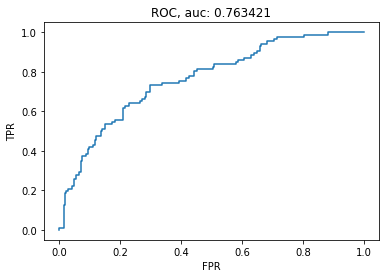

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % metrics.auc(fpr, tpr))

In [29]:
est = pipe.steps[-1][-1]
est

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
pd.DataFrame({"feature": features, "coef": est.coef_.flatten()})

,feature,coef
0,months_loan_duration,0.287334
1,amount,0.347707
2,installment_rate,0.395851
3,residence_history,0.087041
4,age,-0.230289
5,existing_credits,0.221860
6,dependents,0.089317
7,checking_balance_1 - 200 DM,0.118789
8,checking_balance_< 0 DM,0.291796
9,checking_balance_> 200 DM,-0.017142


In [33]:
est.coef_.shape

(1, 61)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [35]:
len(features)

61